In [1]:
import tensorflow as tf

2023-03-12 10:45:40.291895: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-12 10:45:40.467466: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-12 10:45:40.467492: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-12 10:45:41.055291: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
print(tf.__version__)

2.11.0


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam # - Work

In [4]:
from tensorflow.keras.datasets import fashion_mnist 

In [5]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [6]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [7]:
y_train.shape,y_test.shape

((60000,), (10000,))

In [8]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [9]:
 class_names = ['0 Top/T-shirt','1 Trouser','2 Pullover','3 Dress','4 Coat','5 Sandal','6 Shirt' ,'7 Sneaker','8 Bag','9 Ankle boot']
 print(class_names)

['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']


(<matplotlib.image.AxesImage at 0x7f45b93d5a80>, 0)

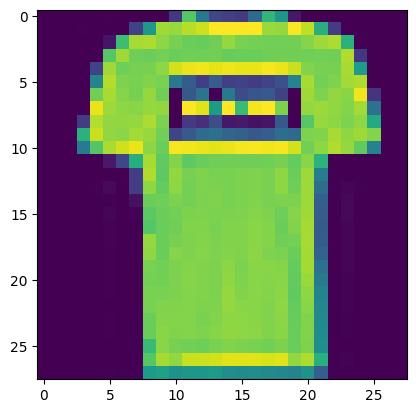

In [10]:
plt.figure()
(plt.imshow(x_train[1]),y_train[1])

In [11]:
x_train = x_train/255.0
x_test = x_test/255.0

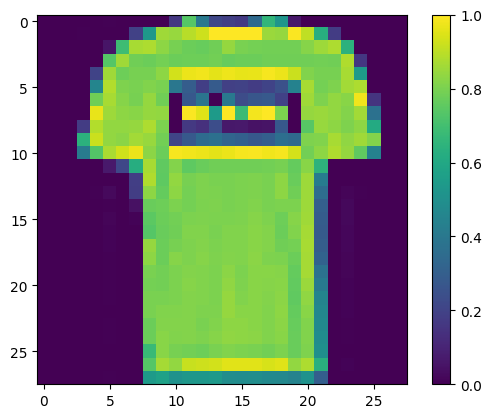

In [12]:
plt.figure()
(plt.imshow(x_train[1]),y_train[1])
plt.colorbar()

In [13]:
x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)

In [14]:
x_train.shape,x_train.shape

((60000, 784), (60000, 784))

In [15]:
model = tf.keras.models.Sequential()

2023-03-12 10:45:42.755621: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-12 10:45:42.755636: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-12 10:45:42.755650: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (karthik-Dell-G15-5515): /proc/driver/nvidia/version does not exist
2023-03-12 10:45:42.755803: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
model.add(tf.keras.layers.Dense(units = 128,activation='relu',input_shape = (784,)))

In [17]:
model.add(tf.keras.layers.Dropout(0.4))

In [18]:
model.add(tf.keras.layers.Dense(units = 10,activation='softmax'))

In [19]:
model.compile(optimizer=Adam(learning_rate = 0.001),loss='sparse_categorical_crossentropy',metrics = ['sparse_categorical_accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [21]:
x_train.shape ,y_train.shape

((60000, 784), (60000,))

In [22]:
model.fit(x_train,y_train,validation_split = 0.1,epochs = 15 ,shuffle = True)

Epoch 1/15
1688/1688 [==============================] - 3s 1ms/step - loss: 0.5902 - sparse_categorical_accuracy: 0.7911 - val_loss: 0.4229 - val_sparse_categorical_accuracy: 0.8450
Epoch 2/15
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4490 - sparse_categorical_accuracy: 0.8390 - val_loss: 0.3841 - val_sparse_categorical_accuracy: 0.8562
Epoch 3/15
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4167 - sparse_categorical_accuracy: 0.8495 - val_loss: 0.3654 - val_sparse_categorical_accuracy: 0.8705
Epoch 4/15
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3956 - sparse_categorical_accuracy: 0.8566 - val_loss: 0.3590 - val_sparse_categorical_accuracy: 0.8710
Epoch 5/15
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3789 - sparse_categorical_accuracy: 0.8611 - val_loss: 0.3477 - val_sparse_categorical_accuracy: 0.8738
Epoch 6/15
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3661 - spars

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [24]:
test_loss,test_accuracy = model.evaluate(x_test,y_test)


313/313 [==============================] - 0s 729us/step - loss: 0.3434 - sparse_categorical_accuracy: 0.8793


In [25]:
test_accuracy

0.8792999982833862

In [26]:
y_pred = model.predict(x_test)
classes=np.argmax(y_pred,axis=1)

313/313 [==============================] - 0s 703us/step


In [27]:
classes

array([9, 2, 1, ..., 8, 1, 5])

In [28]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [29]:
cm = confusion_matrix(y_test,classes)
cm

array([[843,   0,  12,  24,   4,   1, 109,   0,   7,   0],
       [  2, 966,   0,  21,   4,   0,   5,   0,   2,   0],
       [ 13,   0, 790,  11, 112,   0,  71,   0,   3,   0],
       [ 22,   5,   9, 900,  26,   0,  34,   0,   4,   0],
       [  0,   0, 107,  42, 788,   0,  60,   0,   3,   0],
       [  0,   0,   0,   0,   0, 964,   0,  25,   1,  10],
       [115,   1,  90,  29,  79,   0, 668,   0,  18,   0],
       [  0,   0,   0,   0,   0,  21,   0, 957,   0,  22],
       [  4,   0,   3,   4,   5,   1,   3,   4, 976,   0],
       [  0,   0,   0,   0,   0,  13,   1,  45,   0, 941]])

In [30]:
ac = accuracy_score(y_test,classes)
ac

0.8793

# saving and loading the model

In [31]:
import os.path
if os.path.isfile('models/mnist ann.h5') is False :
  model.save('models/mnist ann.h5')

In [32]:
# from keras.api._v2.keras.models import load_model
from tensorflow.keras.models import load_model
new_model = load_model('models/mnist ann.h5')

In [33]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [34]:
new_model.get_weights()

[array([[-0.01377722,  0.07240672, -0.06919706, ...,  0.12972862,
         -0.05250598,  0.0339182 ],
        [-0.05184999,  0.00265697, -0.00559221, ..., -0.01625856,
          0.10368701, -0.15921845],
        [-0.18460038, -0.07837061,  0.08739042, ..., -0.26589623,
          0.53045094, -0.12295637],
        ...,
        [ 0.19415717,  0.05324152, -0.05674918, ..., -0.08930565,
         -0.0574213 , -0.03475932],
        [-0.05374454, -0.03651961,  0.02871707, ..., -0.00110617,
          0.14008473, -0.163263  ],
        [-0.05835297, -0.01250819,  0.03090048, ...,  0.13434671,
          0.49319825,  0.04223895]], dtype=float32),
 array([ 9.5635027e-01, -2.7103478e-02, -4.2146526e-02,  4.8433900e-01,
         4.0666646e-01,  4.1480345e-01, -4.1615033e-01, -5.9755951e-01,
         2.6757264e-01,  5.2242595e-01,  5.2395463e-01,  2.6493248e-01,
        -2.9157219e-02,  2.7588564e-01,  6.0184532e-01, -1.5984841e-01,
         5.9143049e-01, -1.2733366e-02, -2.6570845e-02,  1.5794616e-02

In [35]:
new_model.optimizer

In [36]:
json_string = model.to_json()

In [37]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 784], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 784], "units": 128, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dropout", "config": {"name": "dropout", "trainable": true, "dtype": "float32", "rate": 0.4, "noise_shape": null, "seed": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 10, "activation": "softmax", "use_bias": true, "kernel_initializer": 

In [38]:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

In [39]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [40]:
import os.path
if os.path.isfile('models/mnist ann_weights.h5') is False :
  model.save('models/mnist ann_weights.h5')

In [41]:
#create the same model architecture and use load_weights